# Vehicle Range Prediction

In [1]:
# minzhou@bu.edu

In [102]:
import os
import json
from ast import literal_eval
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
import re
%matplotlib inline

## 1. Load data

In [2]:
data_folder = 'new_data'


def save_all_json_file_paths(num_of_files):
    count = 0
    json_files = []
    for file in os.listdir(data_folder):
        
        json_files.append(os.path.join(data_folder, file))
        count += 1
        if count == num_of_files:
            break
    return json_files

In [11]:
json_files = save_all_json_file_paths(20000)

## 2. Select the input variables

- 'num_HEU',
- 'num_HPU',
- 'dP_threshold',
- 'system_range',
- 'HPU_nominal_energy',
- 'HEU_nominal_energy',
- 'vehicle_chassisMassMinBatteryMass',
- 'vehicle_dragResistance',
- 'vehicle_frontalArea',
- 'vehicle_rollingResistance',
- 'HPU_power_per_kg',
- 'HEU_power_per_kg',
- 'HPU_cost_per_kw',
- 'HEU_cost_per_kw',
- 'system_cost_per_kg'

## Output
* system_range

In [12]:
len(json_files)

20000

In [13]:
feature_list = []
for file_name in json_files:
    try:
        with open(file_name) as data_file:
            json_file = json.load(data_file)
#             if 'HPU_weight' in json_file:
            python_dict = literal_eval(json_file)
            df = pd.DataFrame.from_dict(python_dict)
            python_dict_input = json.loads(df.input[0])

            # HPU and HEU specifications
            df_hpu_heu = pd.DataFrame(python_dict_input, columns=['HPU', 'HEU'])
            df_hpu_heu_series = df_hpu_heu.T[['cost_per_cell', 'nominal_energy', 'cell_mass']].stack()

            # vehicle input variables
            df_vehicle = pd.DataFrame(python_dict_input, columns=['vehicle'])
            df_vehicle_series = df_vehicle.T[['chassisMassMinBatteryMass', 'dragResistance', 
                                              'frontalArea', 'rollingResistance', 'powerTrainEff']].stack()
            # system specifications
            df_spec_series = df.specifications[['system_cost', 'system_weight', 
                                                'HEU_max_power', 'HPU_max_power', 'num_HEU', 
                                                'num_HPU', 'dP_threshold', 'system_range']]
            # concate all features
            feature_series = pd.concat([df_spec_series, df_hpu_heu_series, df_vehicle_series])
            feature_list.append(feature_series)
#             else:
#                 continue
    except:
        continue

In [314]:
feature_df = pd.concat(feature_list, axis=1, sort=False).T
feature_df

,system_cost,system_weight,HEU_max_power,HPU_max_power,num_HEU,num_HPU,dP_threshold,system_range,HPU_cost_per_cell,HPU_nominal_energy,...,vehicle_dragResistance,vehicle_frontalArea,vehicle_rollingResistance,vehicle_powerTrainEff,dollar_per_kg,cost_per_kg,HPU_power_per_kg,HEU_power_per_kg,HPU_cost_per_kw,HEU_cost_per_kw
0,"18,387.5000",537.6800,53.7358,9.9043,"7,100.0000",140.0000,7.6852,409.9620,29.0000,0.4762,...,0.2400,2.3400,0.0150,84.0000,34.1979,34.1979,0.0190,1.1195,2.9280,0.0279
1,"1,890.0000",74.4120,7.1108,3.0817,900.0000,360.0000,0.3002,378.0323,1.2000,1.1108,...,0.4200,0.4200,0.0120,84.0000,25.3991,25.3991,0.0790,0.1481,0.3894,0.1688
2,"3,870.0000",157.7160,35.0760,35.9806,"2,300.0000",280.0000,1.1939,148.1937,1.2000,0.8639,...,0.2800,2.1500,0.0150,84.0000,24.5378,24.5378,0.9226,0.7308,0.0334,0.0342
3,"17,096.2500",547.9500,54.8083,14.6375,"6,000.0000",300.0000,6.0052,429.5581,8.1900,3.6720,...,0.2400,2.3400,0.0150,84.0000,31.2004,31.2004,0.0714,0.9135,0.5595,0.0341
4,"8,280.0000",320.8140,46.6103,32.4297,"3,500.0000","2,020.0000",1.3043,272.1152,1.2000,6.2327,...,0.2800,2.1500,0.0150,84.0000,25.8093,25.8093,0.8315,0.9710,0.0370,0.0257
5,"7,300.0000",270.4000,40.4735,11.4088,"3,900.0000",40.0000,4.2415,258.2613,29.0000,0.1360,...,0.2800,2.1500,0.0150,84.0000,26.9970,26.9970,0.0219,0.8432,2.5419,0.0296
6,"10,110.0000",379.1580,41.6958,19.4274,"3,200.0000","3,540.0000",2.7517,283.0451,1.2000,10.9227,...,0.2800,2.1500,0.0150,84.0000,26.6643,26.6643,0.4981,0.8687,0.0618,0.0288
7,"7,080.0000",288.4440,53.6759,22.0388,"4,200.0000",520.0000,2.6339,281.4604,1.2000,1.6045,...,0.2800,2.1500,0.0150,84.0000,24.5455,24.5455,0.5651,1.1182,0.0544,0.0224
8,"5,325.0000",171.6000,26.5314,17.1132,"2,100.0000",60.0000,5.5829,138.4391,29.0000,0.2041,...,0.2800,2.1500,0.0150,84.0000,31.0315,31.0315,0.0329,0.5527,1.6946,0.0452
9,"7,680.0000",301.7040,49.0897,11.2793,"3,600.0000","1,520.0000",4.3078,265.0767,1.2000,4.6900,...,0.2800,2.1500,0.0150,84.0000,25.4554,25.4554,0.2892,1.0227,0.1064,0.0244


In [195]:
features = feature_df

In [198]:
feature_name_list = features.columns.values.tolist()
feature_name_list = [re.sub(r'[^\w\s]','',str(name).replace(' ', '_')) for name in feature_name_list]
features.columns = feature_name_list
feature_name_list

['system_cost',
 'system_weight',
 'HEU_max_power',
 'HPU_max_power',
 'num_HEU',
 'num_HPU',
 'dP_threshold',
 'system_range',
 'HPU_cost_per_cell',
 'HPU_nominal_energy',
 'HPU_cell_mass',
 'HEU_cost_per_cell',
 'HEU_nominal_energy',
 'HEU_cell_mass',
 'vehicle_chassisMassMinBatteryMass',
 'vehicle_dragResistance',
 'vehicle_frontalArea',
 'vehicle_rollingResistance',
 'vehicle_powerTrainEff']

## Add new features

In [283]:
features['system_cost_per_kg'] = features['system_cost']/features['system_weight']

In [284]:
features['HPU_power_per_kg'] = features['HPU_max_power']/features['HPU_cell_mass']
features['HEU_power_per_kg'] = features['HEU_max_power']/features['HEU_cell_mass']
features['HPU_cost_per_kw'] = features['HPU_cost_per_cell']/features['HPU_max_power']
features['HEU_cost_per_kw'] = features['HEU_cost_per_cell']/features['HEU_max_power']

In [285]:
new_features = features.drop(['system_cost', 'system_weight', 'HPU_max_power', 'HPU_cell_mass', 
               'HEU_cell_mass', 'HPU_cost_per_cell',
               'HEU_cost_per_cell', 'HEU_max_power', 'vehicle_powerTrainEff'], axis=1)

In [286]:
new_features

,num_HEU,num_HPU,dP_threshold,system_range,HPU_nominal_energy,HEU_nominal_energy,vehicle_chassisMassMinBatteryMass,vehicle_dragResistance,vehicle_frontalArea,vehicle_rollingResistance,HPU_power_per_kg,HEU_power_per_kg,HPU_cost_per_kw,HEU_cost_per_kw,system_cost_per_kg
0,"7,100.0000",140.0000,7.6852,409.9620,0.4762,60.2897,"1,756.0000",0.2400,2.3400,0.0150,0.0190,1.1195,2.9280,0.0279,34.1979
1,900.0000,360.0000,0.3002,378.0323,1.1108,8.0975,189.0000,0.4200,0.4200,0.0120,0.0790,0.1481,0.3894,0.1688,25.3991
2,"2,300.0000",280.0000,1.1939,148.1937,0.8639,20.6937,"1,542.0000",0.2800,2.1500,0.0150,0.9226,0.7308,0.0334,0.0342,24.5378
3,"6,000.0000",300.0000,6.0052,429.5581,3.6720,61.5060,"1,756.0000",0.2400,2.3400,0.0150,0.0714,0.9135,0.5595,0.0341,31.2004
4,"3,500.0000","2,020.0000",1.3043,272.1152,6.2327,31.4904,"1,542.0000",0.2800,2.1500,0.0150,0.8315,0.9710,0.0370,0.0257,25.8093
5,"3,900.0000",40.0000,4.2415,258.2613,0.1360,35.0893,"1,542.0000",0.2800,2.1500,0.0150,0.0219,0.8432,2.5419,0.0296,26.9970
6,"3,200.0000","3,540.0000",2.7517,283.0451,10.9227,28.7912,"1,542.0000",0.2800,2.1500,0.0150,0.4981,0.8687,0.0618,0.0288,26.6643
7,"4,200.0000",520.0000,2.6339,281.4604,1.6045,37.7884,"1,542.0000",0.2800,2.1500,0.0150,0.5651,1.1182,0.0544,0.0224,24.5455
8,"2,100.0000",60.0000,5.5829,138.4391,0.2041,18.8942,"1,542.0000",0.2800,2.1500,0.0150,0.0329,0.5527,1.6946,0.0452,31.0315
9,"3,600.0000","1,520.0000",4.3078,265.0767,4.6900,32.3901,"1,542.0000",0.2800,2.1500,0.0150,0.2892,1.0227,0.1064,0.0244,25.4554


In [372]:
new_features.columns.values.tolist()

['num_HEU',
 'num_HPU',
 'dP_threshold',
 'system_range',
 'HPU_nominal_energy',
 'HEU_nominal_energy',
 'vehicle_chassisMassMinBatteryMass',
 'vehicle_dragResistance',
 'vehicle_frontalArea',
 'vehicle_rollingResistance',
 'HPU_power_per_kg',
 'HEU_power_per_kg',
 'HPU_cost_per_kw',
 'HEU_cost_per_kw',
 'system_cost_per_kg']

### Correlation between the different features. 

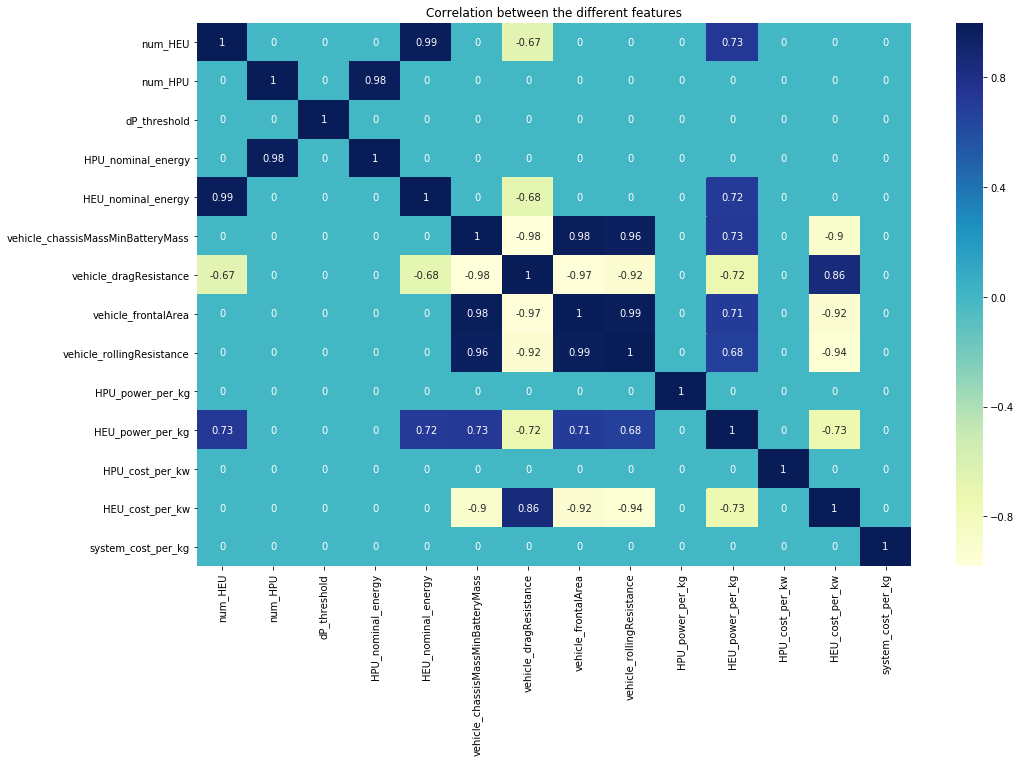

In [445]:
input_df = new_features.drop(['system_range'], axis=1)
pd.options.display.float_format = '{:,.4f}'.format
df = input_df.astype('float64')
corr = df.corr()
corr[np.abs(corr) < 0.65] = 0
plt.figure(figsize=(16,10))
plt.title('Correlation between the different features')
sns.heatmap(corr, annot=True, cmap='YlGnBu')
plt.savefig('corr_above65.png', bbox_inches='tight')
plt.show()


### Convert to array and prepare training and test data

In [374]:
X = input_df.values.astype(float)
y = features['system_range'].values.astype(float)
print(X.shape, y.shape)

(19999, 14) (19999,)


## 3. Split the dataset to training and testing set

In [375]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 4.1 SVR

In [352]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [217]:
from sklearn.svm import SVR

clf = SVR()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
53.00431858715832

The MSE is: 
4677.054412496642

The r2_score is: 
0.005410815180966311


## 4.2 Random Forest regressor

In [428]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
0.5524974249812623

The MSE is: 
1.5415799622998243

The r2_score is: 
0.9996721785502558


In [430]:
import pickle
# save the model to disk
filename = 'rf_model.sav'
pickle.dump(rf, open(filename, 'wb'))

In [378]:
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = input_df.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
HEU_nominal_energy,0.7833
HPU_nominal_energy,0.0606
num_HPU,0.0569
num_HEU,0.0346
HEU_cost_per_kw,0.0170
vehicle_dragResistance,0.0164
HEU_power_per_kg,0.0128
system_cost_per_kg,0.0056
dP_threshold,0.0032
HPU_power_per_kg,0.0029


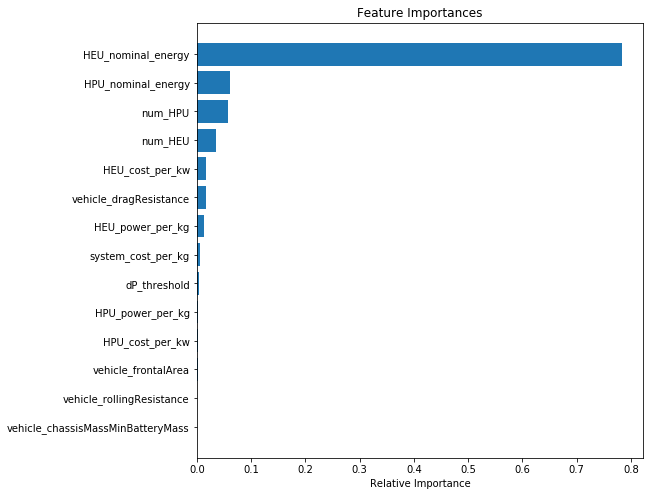

In [380]:
# Plot the feature importances of the forest
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [input_df.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('feature_importance.png', bbox_inches='tight');


In [398]:
indices

array([ 5,  8,  7, 11,  9,  2, 13, 10,  6, 12,  0,  1,  3,  4])

## 4.3 K Nearest Neighbors - Regression

In [431]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2, p=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
1.6057471522308233

The MSE is: 
29.333439834086445

The r2_score is: 
0.9937621589488952


In [434]:
# save the model to disk
filename = 'knn_model.sav'
pickle.dump(knn, open(filename, 'wb'))

## 4.4 Decision Tree Regressor

In [435]:
from sklearn.tree import DecisionTreeRegressor

regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
2.3158205082668664

The MSE is: 
12.46495548019378

The r2_score is: 
0.9973492910673165


In [436]:
# save the model to disk
filename = 'tree_model.sav'
pickle.dump(regr, open(filename, 'wb'))

## 4.5 Bayesian Ridge

In [383]:
from sklearn.linear_model import BayesianRidge

clf = BayesianRidge(compute_score=True)
clf.fit(X, y)
y_pred = clf.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
3.8337469190778224

The MSE is: 
89.0358517564632

The r2_score is: 
0.9810662679096653


## 4.6 OLS from statsmodels

In [300]:
data_df = feature_df.T

In [172]:
name_list = data_df.columns.values.tolist()
name_list = [re.sub(r'[^\w\s]','',str(name).replace(' ', '_')) for name in name_list]
data_df.columns = name_list
data_df.columns

Index(['system_cost', 'system_weight', 'HEU_max_power', 'HPU_max_power',
       'num_HEU', 'num_HPU', 'dP_threshold', 'system_range',
       'HPU_cost_per_cell', 'HPU_nominal_energy', 'HPU_cell_mass',
       'HEU_cost_per_cell', 'HEU_nominal_energy', 'HEU_cell_mass',
       'vehicle_chassisMassMinBatteryMass', 'vehicle_dragResistance',
       'vehicle_frontalArea', 'vehicle_rollingResistance',
       'vehicle_powerTrainEff'],
      dtype='object')

In [173]:
len(name_list)

19

In [368]:
input_df.columns.values.tolist()

['num_HEU',
 'num_HPU',
 'dP_threshold',
 'HPU_nominal_energy',
 'HEU_nominal_energy',
 'vehicle_chassisMassMinBatteryMass',
 'vehicle_dragResistance',
 'vehicle_frontalArea',
 'vehicle_rollingResistance',
 'HPU_power_per_kg',
 'HEU_power_per_kg',
 'HPU_cost_per_kw',
 'HEU_cost_per_kw',
 'system_cost_per_kg']

In [437]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

model = sm.OLS(y_train, X_train)
results = model.fit()

results.summary(xname=input_df.columns.values.tolist())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 4.565e+04
Date:                Sat, 08 Dec 2018   Prob (F-statistic):               0.00
Time:                        16:32:24   Log-Likelihood:                -49981.
No. Observations:               13399   AIC:                         9.999e+04
Df Residuals:                   13385   BIC:                         1.001e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
num_HEU                               0.0122      0.001     22.775      0.000       0.011       0.013
num_HPU                              -0.0044      0.001     -8.224      0.000      -0.005      -0.003
dP_threshold                          1.5582      0.079     19.796      0.000       1.404       1.713
HPU_nominal_energy                    8.3476      0.171     48.928      0.000       8.013       8.682
HEU_nominal_energy                    6.1369      0.059    103.616      0.000       6.021       6.253
vehicle_chassisMassMinBatteryMass    -0.1313      0.006    -20.952      0.000      -0.144      -0.119
vehicle_dragResistance               62.7676    105.289      0.596      0.551    -143.613     269.148
vehicle_frontalArea                -148.4781     11.629    -12.768      0.000    -171.273    -125.684
vehicle_rollingResistance          3.088e+04   4282.686      7.210      0.000    2.25e+04    3.93e+04
HPU_power_per_kg                     14.6516      0.783     18.718      0.000      13.117      16.186
HEU_power_per_kg                    -14.3175      0.901    -15.890      0.000     -16.084     -12.551
HPU_cost_per_kw                       3.3475      0.173     19.365      0.000       3.009       3.686
HEU_cost_per_kw                    -570.8824      5.877    -97.142      0.000    -582.402    -559.363
system_cost_per_kg                    1.8231      0.072     25.464      0.000       1.683       1.963
==============================================================================
Omnibus:                     3979.036   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           654303.112
Skew:                          -0.033   Prob(JB):                         0.00
Kurtosis:                      37.234   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [438]:
y_pred = results.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
3.850299062161083

The MSE is: 
89.39804942008915

The r2_score is: 
0.9809892455260799


In [439]:
# save the model to disk
filename = 'ols_model.sav'
pickle.dump(results, open(filename, 'wb'))

### Check if overfitting

In [388]:
errors_train = y_train - X_train @ results.params
errors_test = y_test - X_test @ results.params
RMSE_linear_training = np.linalg.norm(errors_train / math.sqrt(len(errors_train)))
RMSE_linear_test = np.linalg.norm(errors_test / math.sqrt(len(errors_test)))
print("Training RMSE is " + str(RMSE_linear_training))
print("Test RMSE is " + str(RMSE_linear_test))

Training RMSE is 10.086981318553155
Test RMSE is 9.455054173302718


From above training and test RMSE, our model doesn't have obvious overfitting problem.

In [390]:
results.params

array([ 1.22293938e-02, -4.36381094e-03,  1.55821862e+00,  8.34764016e+00,
        6.13688817e+00, -1.31250165e-01,  6.27676080e+01, -1.48478062e+02,
        3.08802498e+04,  1.46516119e+01, -1.43174954e+01,  3.34746955e+00,
       -5.70882398e+02,  1.82307923e+00])

### Confidence intervals and significance
If the confidence interval for the parameter includes zero, the associated independent variable may not have any predictive value.

In [305]:
print('Confidence Intervals: \n {}'.format(results.conf_int()))
print('Parameters: {}'.format(results.params))

Confidence Intervals: 
 [[ 1.11768643e-02  1.32819232e-02]
 [-5.40394969e-03 -3.32367219e-03]
 [ 1.40392699e+00  1.71251025e+00]
 [ 8.01321579e+00  8.68206453e+00]
 [ 6.02079390e+00  6.25298244e+00]
 [-1.43528922e-01 -1.18971408e-01]
 [-1.43613109e+02  2.69148325e+02]
 [-1.71272556e+02 -1.25683568e+02]
 [ 2.24855796e+04  3.92749200e+04]
 [ 1.31172636e+01  1.61859603e+01]
 [-1.60836961e+01 -1.25512947e+01]
 [ 3.00863163e+00  3.68630747e+00]
 [-5.82401688e+02 -5.59363108e+02]
 [ 1.68274439e+00  1.96341406e+00]]
Parameters: [ 1.22293938e-02 -4.36381094e-03  1.55821862e+00  8.34764016e+00
  6.13688817e+00 -1.31250165e-01  6.27676080e+01 -1.48478062e+02
  3.08802498e+04  1.46516119e+01 -1.43174954e+01  3.34746955e+00
 -5.70882398e+02  1.82307923e+00]


In [309]:
len(notSignificant)

14

In [310]:
len(input_df.columns)

14

In [308]:
CIs = results.conf_int()
notSignificant = (CIs[:,0] < 0) & (CIs[:,1] > 0)
significant_name_list = []
print('Features is not Significant:')
for index, item in enumerate(notSignificant):
    if not item:
        print(f'{feature_name_list[index]} -> {item}')
        significant_name_list.append(input_df.columns[index])

Features is not Significant:
system_weight -> False
HEU_max_power -> False
HPU_max_power -> False
num_HEU -> False
num_HPU -> False
dP_threshold -> False
HPU_cost_per_cell -> False
HPU_nominal_energy -> False
HPU_cell_mass -> False
HEU_cost_per_cell -> False
HEU_nominal_energy -> False
HEU_cell_mass -> False
vehicle_chassisMassMinBatteryMass -> False


### Remove not significant features

By eliminating independent variables that are not significant, we help avoid overfitting (since the model no longer needs to account for the noise represented by those variables).

In [334]:
Xsignif_train = X_train[:,~notSignificant]
Xsignif_test = X_test[:,~notSignificant]
significant_name_list = [x for x, y in zip(feature_name_list, ~notSignificant) if y == True]

print(f'Xsignif_train shape: {Xsignif_train.shape}')
print(f'Xsignif_test shape: {Xsignif_test.shape}')

Xsignif_train shape: (13399, 13)
Xsignif_test shape: (6600, 13)


In [336]:
# Xsignif_train = sm.add_constant(Xsignif_train)
model = sm.OLS(y_train, Xsignif_train)
results = model.fit()
results.summary(xname=significant_name_list)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 7.897e+05
Date:                Fri, 07 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:55:06   Log-Likelihood:                -49981.
No. Observations:               13399   AIC:                         9.999e+04
Df Residuals:                   13386   BIC:                         1.001e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
system_weight                         0.0122      0.001     23.127      0.000       0.011       0.013
HEU_max_power                        -0.0042      0.000     -9.336      0.000      -0.005      -0.003
HPU_max_power                         1.5525      0.078     19.871      0.000       1.399       1.706
num_HEU                               8.2959      0.147     56.484      0.000       8.008       8.584
num_HPU                               6.1373      0.059    103.630      0.000       6.021       6.253
dP_threshold                         -0.1347      0.003    -53.448      0.000      -0.140      -0.130
HPU_cost_per_cell                  -155.2978      2.089    -74.326      0.000    -159.393    -151.202
HPU_nominal_energy                 3.343e+04    181.672    184.018      0.000    3.31e+04    3.38e+04
HPU_cell_mass                        14.5786      0.773     18.857      0.000      13.063      16.094
HEU_cost_per_cell                   -14.2192      0.886    -16.052      0.000     -15.956     -12.483
HEU_nominal_energy                    3.3557      0.172     19.475      0.000       3.018       3.693
HEU_cell_mass                      -571.1726      5.856    -97.529      0.000    -582.652    -559.693
vehicle_chassisMassMinBatteryMass     1.8001      0.060     29.853      0.000       1.682       1.918
==============================================================================
Omnibus:                     3986.071   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           661421.162
Skew:                          -0.034   Prob(JB):                         0.00
Kurtosis:                      37.420   Cond. No.                     9.12e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [340]:
y_pred = results.predict(X_test)

# Regression metrics
print('\nThe MAE is: ')
print(mean_absolute_error(y_test, y_pred))
print('\nThe MSE is: ')
print(mean_squared_error(y_test, y_pred))
print('\nThe r2_score is: ')
print(r2_score(y_test, y_pred))


The MAE is: 
3.850299062161083

The MSE is: 
89.39804942008915

The r2_score is: 
0.9809892455260799


In [344]:
results.params

array([ 1.22293938e-02, -4.36381094e-03,  1.55821862e+00,  8.34764016e+00,
        6.13688817e+00, -1.31250165e-01,  6.27676080e+01, -1.48478062e+02,
        3.08802498e+04,  1.46516119e+01, -1.43174954e+01,  3.34746955e+00,
       -5.70882398e+02,  1.82307923e+00])

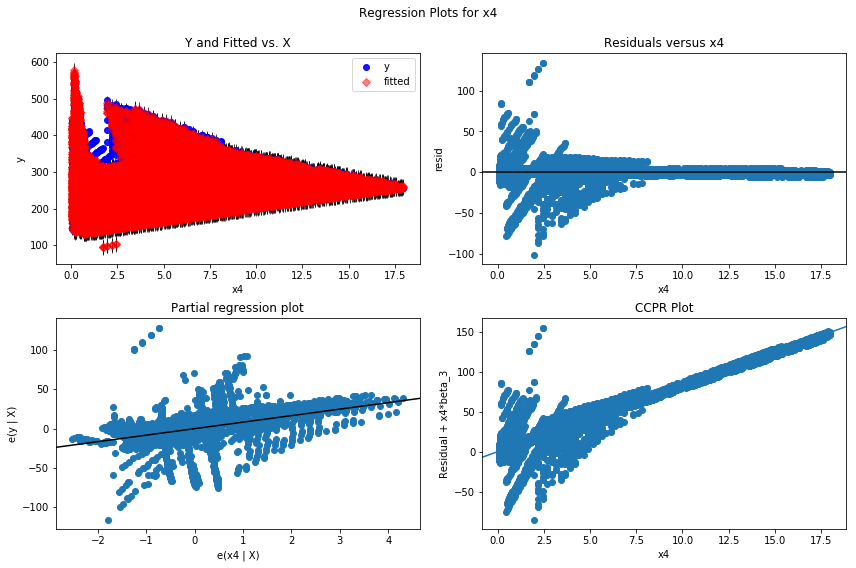

In [337]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(results,3,  fig=fig)


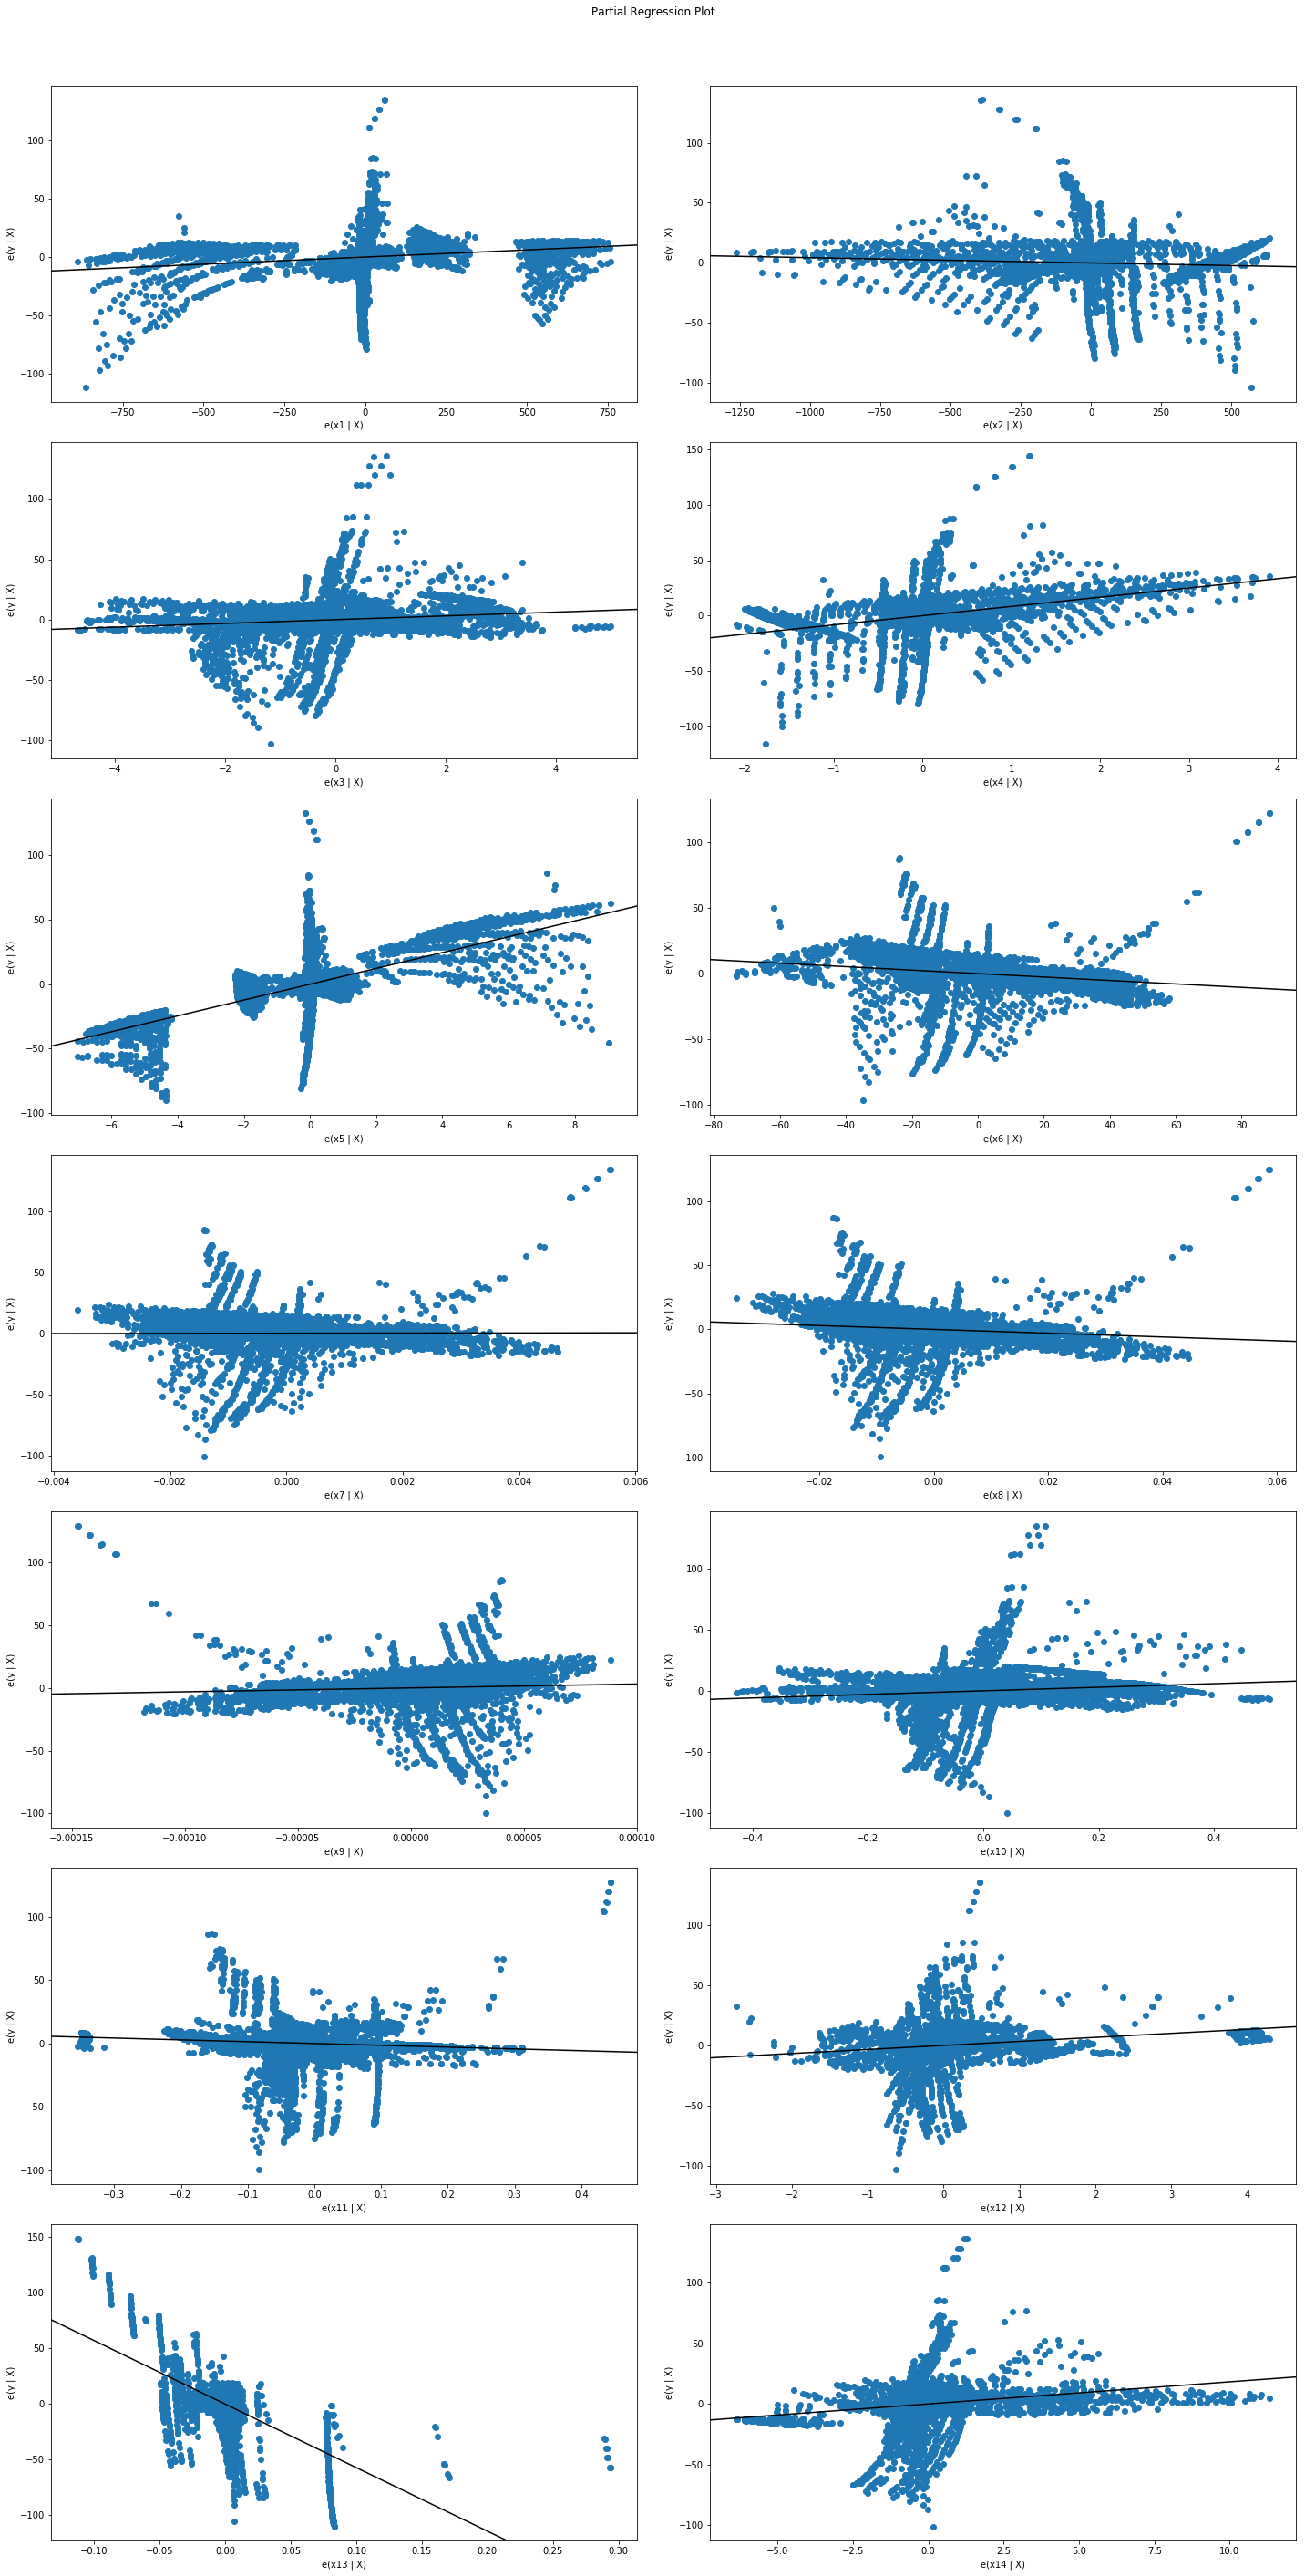

In [446]:
fig = plt.figure(figsize=(20,40))
fig = sm.graphics.plot_partregress_grid(results, fig=fig)
plt.savefig('partregress_grid.png', bbox_inches='tight');

### Show significant features versus system range

In [399]:
indices

array([ 5,  8,  7, 11,  9,  2, 13, 10,  6, 12,  0,  1,  3,  4])

In [418]:
[input_df.columns[i] for i in indices[::-1]]

['HEU_nominal_energy',
 'HPU_nominal_energy',
 'num_HPU',
 'num_HEU',
 'HEU_cost_per_kw',
 'vehicle_dragResistance',
 'HEU_power_per_kg',
 'system_cost_per_kg',
 'dP_threshold',
 'HPU_power_per_kg',
 'HPU_cost_per_kw',
 'vehicle_frontalArea',
 'vehicle_rollingResistance',
 'vehicle_chassisMassMinBatteryMass']

In [421]:
data = X_train[:, indices]
name = [input_df.columns[i] for i in indices[::-1]]

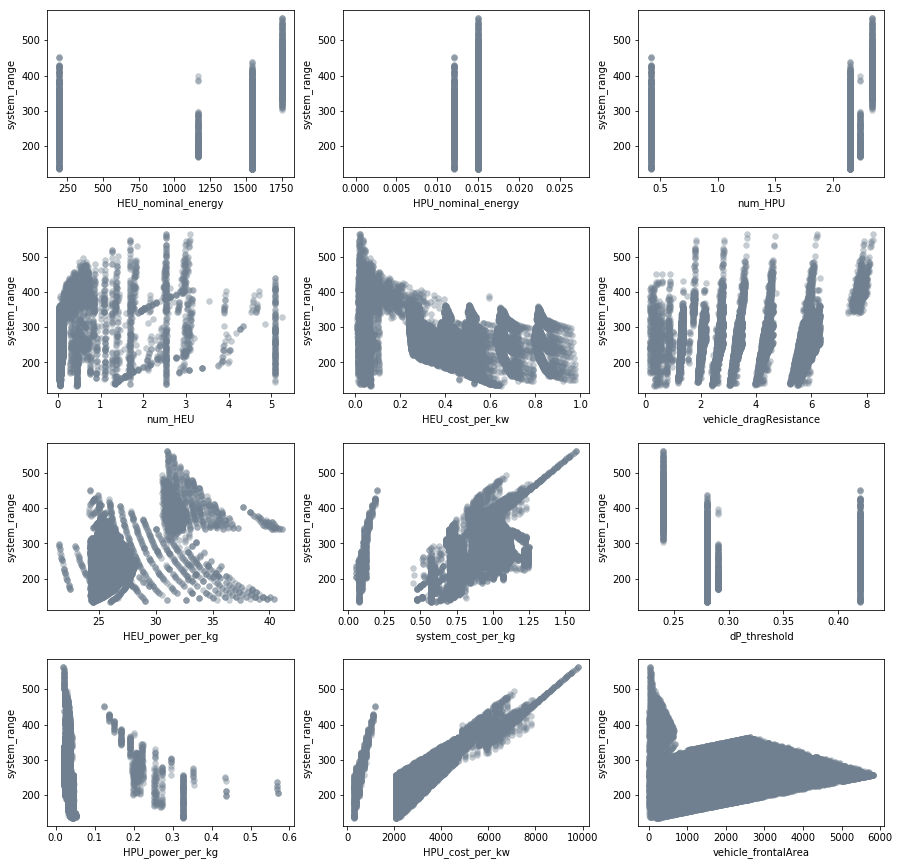

In [427]:
fig, axes = plt.subplots(4,3,figsize=(15,15))

for i in range(12):
    plt_i = i // 3
    plt_j = i % 3
    subX_train = data[:,i]
#     plt.subplot(2, 4, 1 + i)
    axes[plt_i][plt_j].scatter(subX_train, y_train, c="slategray", alpha=0.4, linewidths=0.3)
    #plt.scatter(subX_test, y_test)
    axes[plt_i][plt_j].set_xlabel(name[i])
    axes[plt_i][plt_j].set_ylabel('system_range')
plt.savefig('features.png', bbox_inches='tight')
plt.subplots_adjust(hspace=0.3)

## 5. Load the trained model

In [444]:
# Load the random forest model
filename = 'rf_model.sav'
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9996721785502558
